In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import torch 
from torchvision import datasets, transforms
from torch import optim, nn
import torch.nn.functional as F

In [6]:
# Getting the data and dataloader
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('/home/nagaraj/.pytorch/F_MNIST_data',download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=32,shuffle=False)

In [20]:
classes = ['Tshirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle boot']

torch.Size([64, 1, 28, 28])
tensor(9)


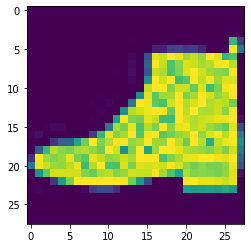

In [8]:
image, label = next(iter(trainloader))
print(image.shape)
plt.imshow(image[0].squeeze())
print(label[0])

In [52]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        self.dropout = nn.Dropout(p=0.25)
        
    def forward(self,x):
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x),dim=1)
        
        return x

In [53]:
model = Classifier()

In [54]:
optimiser = optim.Adam(model.parameters(),lr=0.001)
criterion = nn.NLLLoss()

In [55]:
epochs = 10
train_losses = []
test_losses = []
for e in range(epochs):
    batch_loss = 0
    test_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)
        
        output = model(images)
        loss = criterion(output,labels)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        
        batch_loss += loss.item()
    with torch.no_grad():
        model.eval()
        for images, labels in testloader:
            images = images.view(images.shape[0],-1)
            
            output = model(images)
            loss = criterion(output,labels)
            test_loss +=loss.item()
            
            probs = torch.exp(output)
            _, classes = torch.topk(probs, k=1, dim=1)
            equals = classes == labels.view(*classes.shape)
            accuracy = torch.mean(equals.type(torch.FloatTensor))
    train_losses.append(batch_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
    print(f"Training loss: {batch_loss/len(trainloader)}")
    print(f"Test loss: {test_loss/len(testloader)}")
    print(f"Accuracy: {accuracy.item()*100}%")
    model.train()

Training loss: 0.6252081476167829
Test loss: 0.4465259724912552
Accuracy: 93.75%
Training loss: 0.4536634340628124
Test loss: 0.42259181652682276
Accuracy: 100.0%
Training loss: 0.41502431019950015
Test loss: 0.3951394925007043
Accuracy: 100.0%
Training loss: 0.3903368646497411
Test loss: 0.37520454206262915
Accuracy: 100.0%
Training loss: 0.37363080335641974
Test loss: 0.3807038938323149
Accuracy: 100.0%
Training loss: 0.35725867025442976
Test loss: 0.358116044070774
Accuracy: 100.0%
Training loss: 0.34760579687636545
Test loss: 0.360366378919766
Accuracy: 93.75%
Training loss: 0.3391504656515523
Test loss: 0.3556228763522051
Accuracy: 100.0%
Training loss: 0.33025497563882295
Test loss: 0.3597573728654712
Accuracy: 93.75%
Training loss: 0.32388202556923257
Test loss: 0.345098610622243
Accuracy: 100.0%


Predicted class Trouser
tensor(1)
tensor(1)


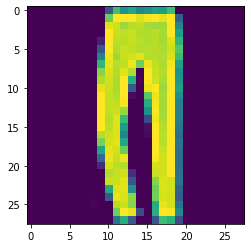

In [45]:
# Passing a single image
data = iter(testloader)
img, label = data.next()
img = img[2].squeeze()

out = model(img.view(1,784))

prob = torch.exp(out)
value, index = torch.topk(prob, k=1,dim=1)

plt.imshow(img)
print(f"Predicted class {classes[index[0][0]]}")
print(label[2])
print(index[0][0])

In [48]:
# Passing a batch
data = iter(testloader)
img, label = data.next()

out = model(img.view(img.shape[0],784))

prob = torch.exp(out)
value, index = torch.topk(prob, k=1,dim=1)

In [49]:
equals = index == label.view(*index.shape)
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f"Accuracy: {accuracy.item()*100}%")

Accuracy: 90.625%


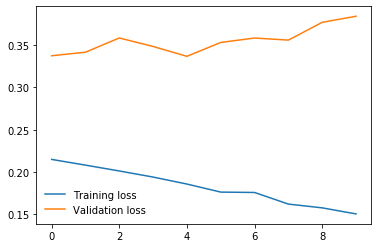

In [51]:
# Losses without regularization
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

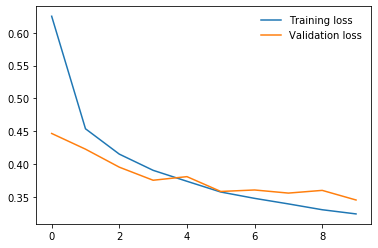

In [56]:
# Losses with regularization (dropout)
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)